In [61]:
from pyforest import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df_cc=pd.read_csv("Credit_Card_Fraud_Detection.csv")
df_cc.head()

<IPython.core.display.Javascript object>

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [62]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [63]:
df_cc.shape

(690, 16)

<IPython.core.display.Javascript object>

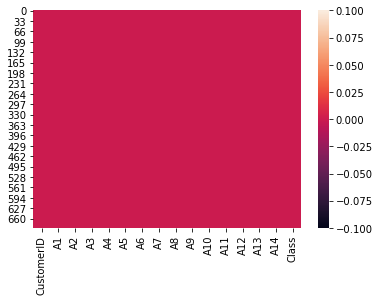

In [64]:
sns.heatmap(df_cc.isnull())

<IPython.core.display.Javascript object>

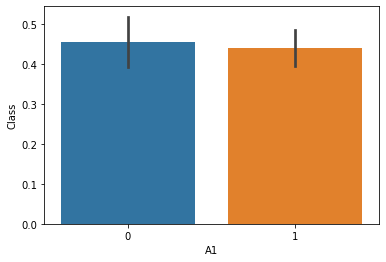

In [65]:
sns.barplot(x="A1",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

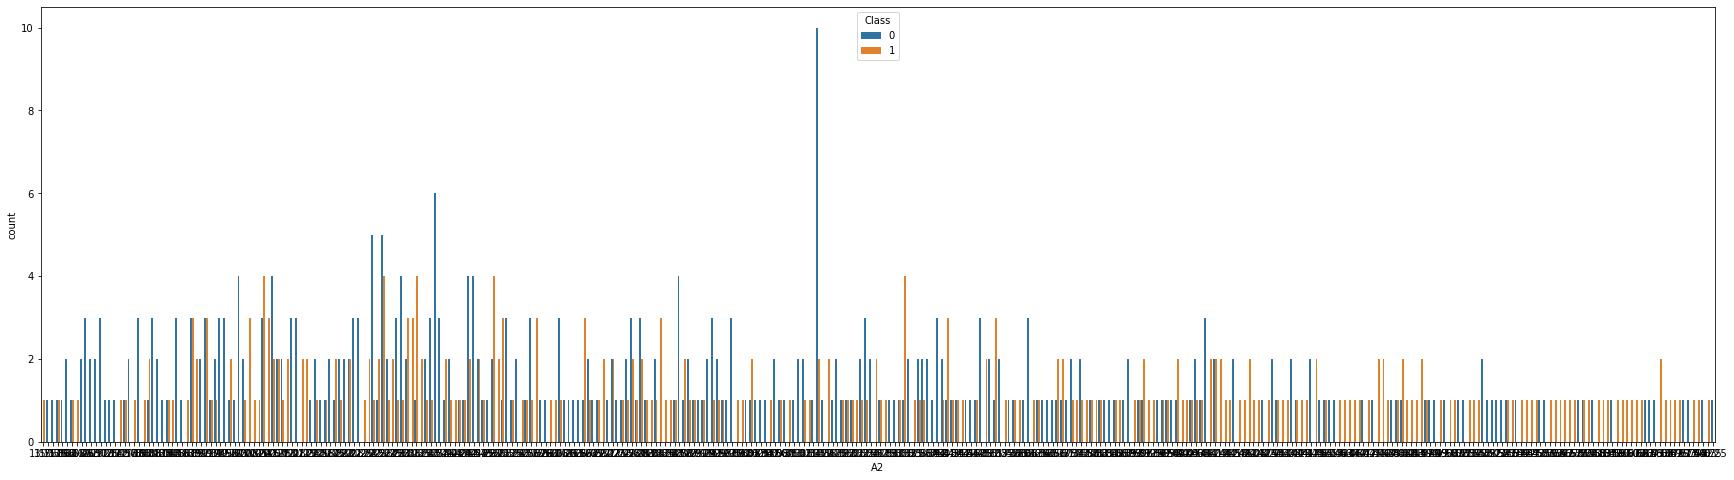

In [66]:
plt.figure(figsize=(30,8))
sns.countplot(x="A2",hue="Class",data=df_cc)

<IPython.core.display.Javascript object>

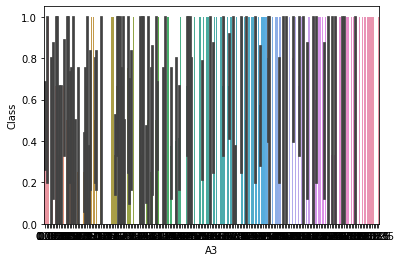

In [67]:
sns.barplot(x='A3', y='Class', data=df_cc)

<IPython.core.display.Javascript object>

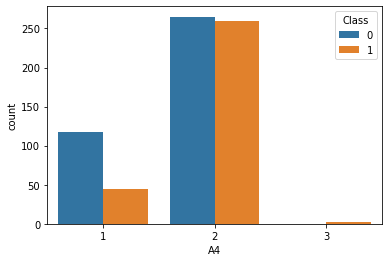

In [68]:
sns.countplot(x="A4",hue="Class",data=df_cc)

<IPython.core.display.Javascript object>

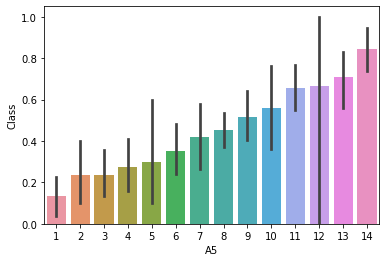

In [69]:
sns.barplot(x="A5",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

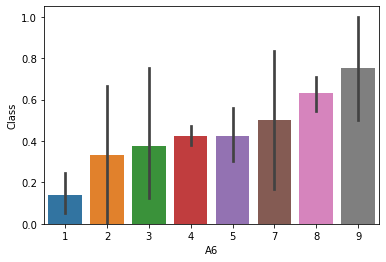

In [70]:
sns.barplot(x="A6",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

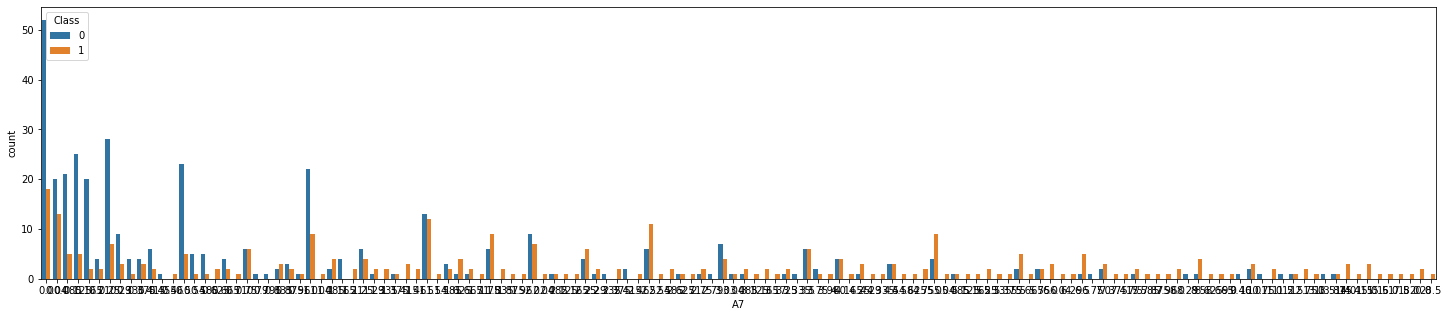

In [71]:
plt.figure(figsize=(25,5))
sns.countplot(x="A7",hue="Class",data=df_cc)

<IPython.core.display.Javascript object>

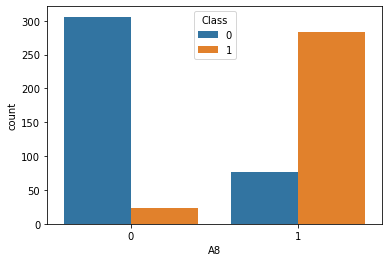

In [72]:
sns.countplot(x="A8",hue="Class",data=df_cc)

<IPython.core.display.Javascript object>

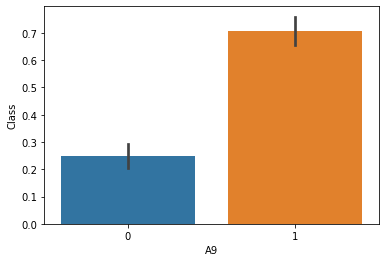

In [73]:
sns.barplot(x="A9",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

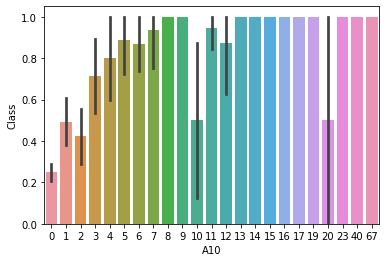

In [74]:
sns.barplot(x="A10",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

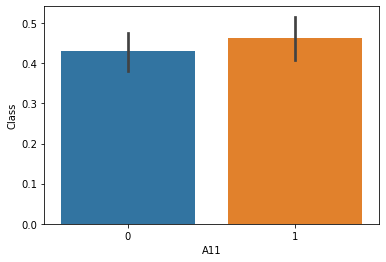

In [75]:
sns.barplot(x="A11",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

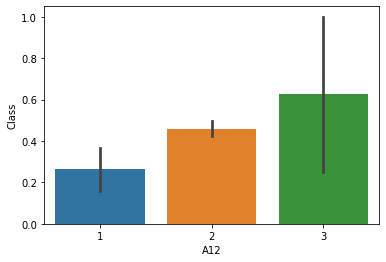

In [76]:
sns.barplot(x="A12",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

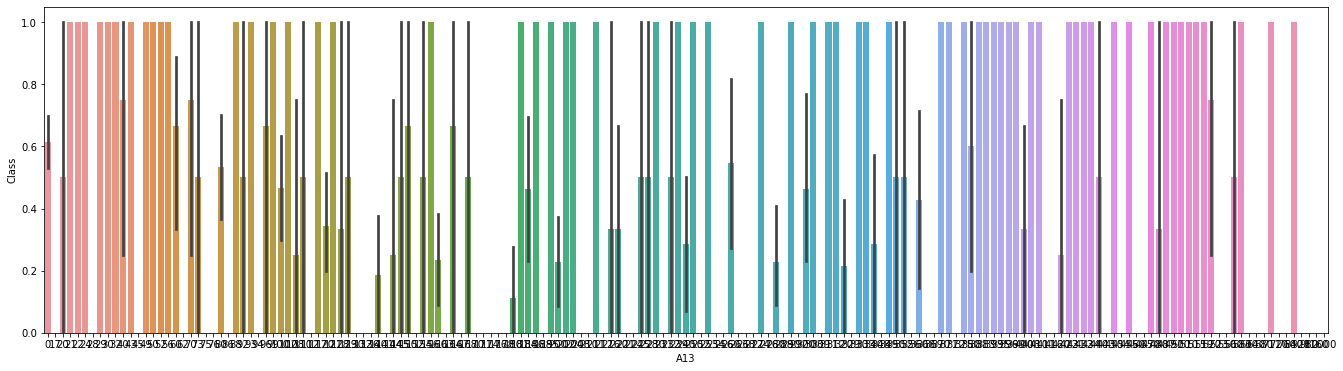

In [77]:
plt.figure(figsize=(23,6))
sns.barplot(x="A13",y="Class",data=df_cc)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

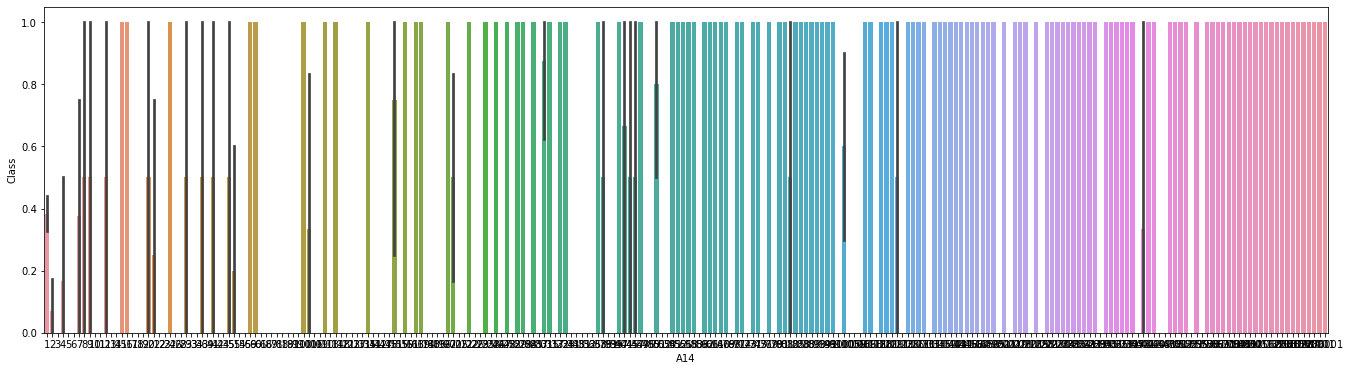

In [78]:
plt.figure(figsize=(23,6))
sns.barplot(x="A14",y="Class",data=df_cc)

In [79]:
df_cc.drop('CustomerID',axis=1,inplace=True)

In [80]:
df_cc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [81]:
df_cc.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


<IPython.core.display.Javascript object>

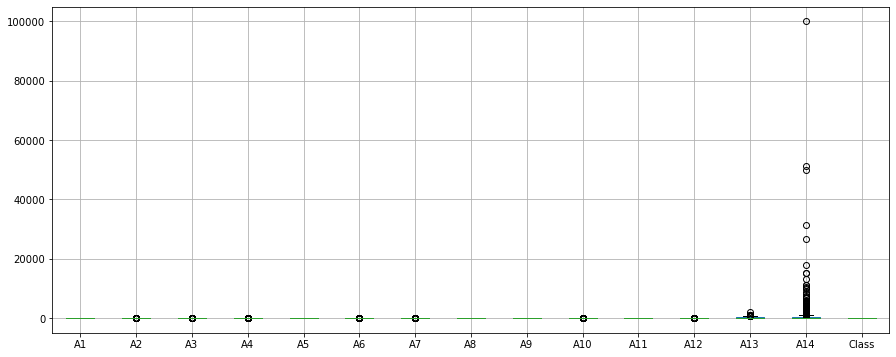

In [82]:
plt.figure(figsize=(15,6))
df_cc.boxplot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

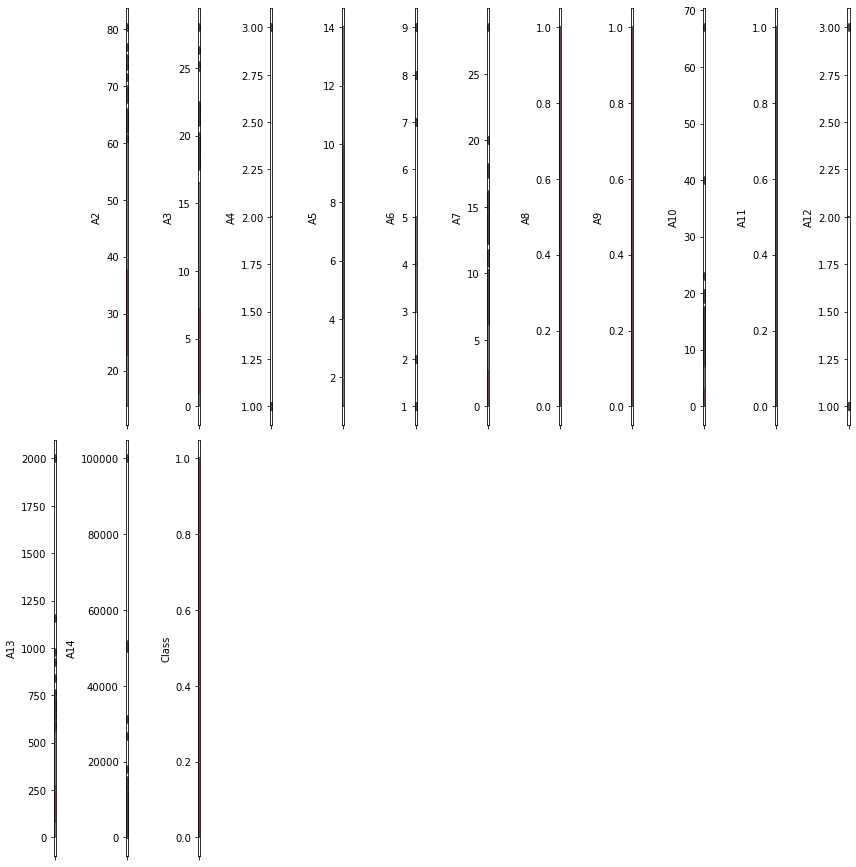

In [83]:
collist=df_cc.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(x=df_cc[collist[i]],color='Red',orient='v')
    plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

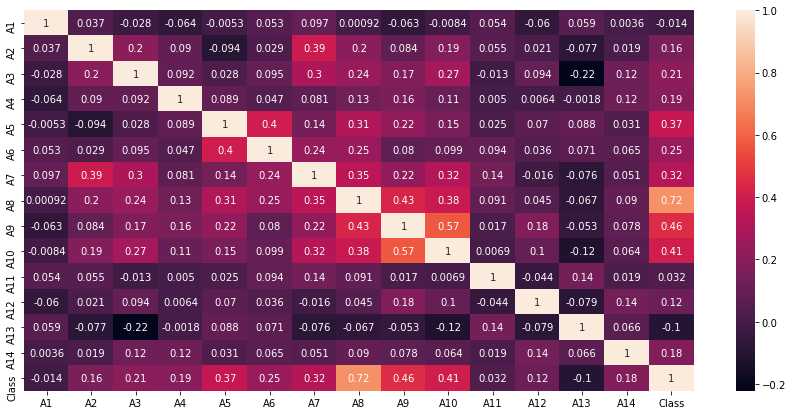

In [84]:
plt.figure(figsize=(15,7))
sns.heatmap(df_cc.corr(),annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

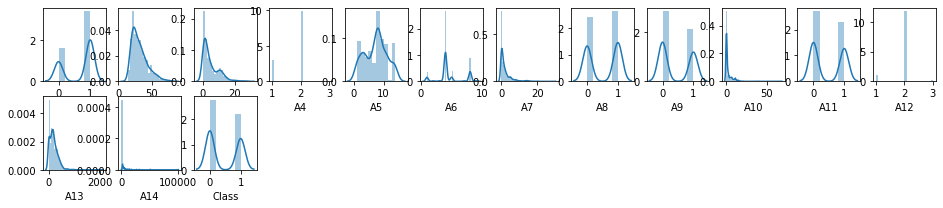

In [85]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_cc[collist[i]])

In [86]:
from scipy.stats import zscore
z=np.abs(zscore(df_cc))
print(np.where(z>3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 27,  34,  35,  36,  39,  63,  63,  70,  74,  74,  78,  84,  85,
        90, 114, 119, 121, 133, 143, 143, 145, 146, 146, 146, 148, 149,
       150, 155, 165, 170, 177, 179, 182, 183, 185, 186, 193, 195, 196,
       199, 202, 204, 216, 225, 228, 233, 233, 233, 237, 237, 239, 239,
       243, 247, 258, 267, 271, 277, 279, 282, 286, 287, 290, 293, 316,
       316, 322, 331, 344, 351, 356, 360, 360, 363, 364, 366, 374, 374,
       375, 390, 394, 415, 434, 448, 452, 452, 471, 476, 482, 484, 486,
       489, 498, 500, 500, 500, 508, 517, 531, 532, 538, 547, 549, 558,
       559, 559, 564, 564, 568, 569, 579, 586, 586, 596, 606, 613, 632,
       639, 641, 642, 643, 645, 654, 654, 661, 669, 677, 680, 689],
      dtype=int64), array([13,  6,  1, 11,  6, 11, 12,  2,  2,  6, 11, 11, 11, 11, 11,  6, 11,
       11,  2,  6,  1,  1,  2,  6,  6, 13, 11, 11, 11, 11, 11,  6,  9, 11,
       11, 11, 11,  9, 13, 12, 13,  9, 11, 11,  6,  2,  6,  9,  1, 11,  6,
       11,  1,  6, 11, 13, 11, 11,  2,

In [87]:
z[34][6]

3.484237271382267

In [88]:
df_cc_final=df_cc[(z<3).all(axis=1)]
print(df_cc_final.shape)
print(df_cc.shape)
df_cc_final.head()

(580, 15)
(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [89]:
#Let's now divide the dataset into input and output(x,y)
df_x=df_cc_final.drop(columns=["Class"])
y=df_cc_final[["Class"]]
print(df_x.shape)
print(y.shape)

(580, 14)
(580, 1)


In [90]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


<IPython.core.display.Javascript object>

In [91]:
from sklearn.metrics import f1_score
def max_f1_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=f1_score(y_test,y_pred)
        print("f1_score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max  f1_score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [92]:
from sklearn.model_selection import cross_val_score
def kfold(clf,x,y,):
    print("Mean  f1_ score for",clf,cross_val_score(clf,x,y,cv=5,scoring="f1").mean())
    print("standard deviation in  f1_scoref or",clf,cross_val_score(clf,x,y,cv=5,scoring="f1").std())
    print(cross_val_score(clf,x,y,cv=5,scoring="f1"))

In [93]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_f1_score(lg,x,y)

<IPython.core.display.Javascript object>

f1_score corresponding to  42  is  0.8712871287128714


<IPython.core.display.Javascript object>

f1_score corresponding to  43  is  0.8932038834951457


<IPython.core.display.Javascript object>

f1_score corresponding to  44  is  0.8865979381443299


<IPython.core.display.Javascript object>

f1_score corresponding to  45  is  0.8571428571428571


<IPython.core.display.Javascript object>

f1_score corresponding to  46  is  0.8823529411764706


<IPython.core.display.Javascript object>

f1_score corresponding to  47  is  0.9038461538461539


<IPython.core.display.Javascript object>

f1_score corresponding to  48  is  0.8627450980392157


<IPython.core.display.Javascript object>

f1_score corresponding to  49  is  0.8703703703703703


<IPython.core.display.Javascript object>

f1_score corresponding to  50  is  0.8468468468468469


<IPython.core.display.Javascript object>

f1_score corresponding to  51  is  0.8518518518518519


<IPython.core.display.Javascript object>

f1_score corresponding to  52  is  0.8990825688073395


<IPython.core.display.Javascript object>

f1_score corresponding to  53  is  0.8518518518518519


<IPython.core.display.Javascript object>

f1_score corresponding to  54  is  0.8349514563106797


<IPython.core.display.Javascript object>

f1_score corresponding to  55  is  0.8431372549019607


<IPython.core.display.Javascript object>

f1_score corresponding to  56  is  0.9038461538461539


<IPython.core.display.Javascript object>

f1_score corresponding to  57  is  0.8623853211009175


<IPython.core.display.Javascript object>

f1_score corresponding to  58  is  0.8727272727272728


<IPython.core.display.Javascript object>

f1_score corresponding to  59  is  0.8785046728971961


<IPython.core.display.Javascript object>

f1_score corresponding to  60  is  0.854368932038835


<IPython.core.display.Javascript object>

f1_score corresponding to  61  is  0.8785046728971961


<IPython.core.display.Javascript object>

f1_score corresponding to  62  is  0.8448275862068965


<IPython.core.display.Javascript object>

f1_score corresponding to  63  is  0.8952380952380952


<IPython.core.display.Javascript object>

f1_score corresponding to  64  is  0.8333333333333333


<IPython.core.display.Javascript object>

f1_score corresponding to  65  is  0.8490566037735848


<IPython.core.display.Javascript object>

f1_score corresponding to  66  is  0.8703703703703703


<IPython.core.display.Javascript object>

f1_score corresponding to  67  is  0.8807339449541284


<IPython.core.display.Javascript object>

f1_score corresponding to  68  is  0.8932038834951457


<IPython.core.display.Javascript object>

f1_score corresponding to  69  is  0.9411764705882353


<IPython.core.display.Javascript object>

f1_score corresponding to  70  is  0.8867924528301887


<IPython.core.display.Javascript object>

f1_score corresponding to  71  is  0.890909090909091


<IPython.core.display.Javascript object>

f1_score corresponding to  72  is  0.8952380952380952


<IPython.core.display.Javascript object>

f1_score corresponding to  73  is  0.86


<IPython.core.display.Javascript object>

f1_score corresponding to  74  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  75  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  76  is  0.897196261682243


<IPython.core.display.Javascript object>

f1_score corresponding to  77  is  0.826923076923077


<IPython.core.display.Javascript object>

f1_score corresponding to  78  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  79  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  80  is  0.7959183673469387


<IPython.core.display.Javascript object>

f1_score corresponding to  81  is  0.8200000000000001


<IPython.core.display.Javascript object>

f1_score corresponding to  82  is  0.8598130841121495


<IPython.core.display.Javascript object>

f1_score corresponding to  83  is  0.9174311926605505


<IPython.core.display.Javascript object>

f1_score corresponding to  84  is  0.9056603773584905


<IPython.core.display.Javascript object>

f1_score corresponding to  85  is  0.8333333333333333


<IPython.core.display.Javascript object>

f1_score corresponding to  86  is  0.9126213592233009


<IPython.core.display.Javascript object>

f1_score corresponding to  87  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  88  is  0.8363636363636364


<IPython.core.display.Javascript object>

f1_score corresponding to  89  is  0.8598130841121495


<IPython.core.display.Javascript object>

f1_score corresponding to  90  is  0.854368932038835


<IPython.core.display.Javascript object>

f1_score corresponding to  91  is  0.9433962264150944


<IPython.core.display.Javascript object>

f1_score corresponding to  92  is  0.8076923076923077


<IPython.core.display.Javascript object>

f1_score corresponding to  93  is  0.8440366972477066


<IPython.core.display.Javascript object>

f1_score corresponding to  94  is  0.8301886792452831


<IPython.core.display.Javascript object>

f1_score corresponding to  95  is  0.8431372549019607


<IPython.core.display.Javascript object>

f1_score corresponding to  96  is  0.8888888888888888


<IPython.core.display.Javascript object>

f1_score corresponding to  97  is  0.851063829787234


<IPython.core.display.Javascript object>

f1_score corresponding to  98  is  0.8703703703703703


<IPython.core.display.Javascript object>

f1_score corresponding to  99  is  0.8461538461538461
max  f1_score corresponding to  91  is  0.9433962264150944


91

In [94]:
kfold(lg,x,y)

Mean  f1_ score for LogisticRegression() 0.8581745818486282
standard deviation in  f1_scoref or LogisticRegression() 0.04534657545632986
[0.88       0.80392157 0.93333333 0.8245614  0.8490566 ]


In [95]:
#lets do with some hypoparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,40)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 26}

In [96]:
kn=KNeighborsClassifier(n_neighbors=26)
max_f1_score(kn,x,y)

<IPython.core.display.Javascript object>

f1_score corresponding to  42  is  0.8723404255319148


<IPython.core.display.Javascript object>

f1_score corresponding to  43  is  0.865979381443299


<IPython.core.display.Javascript object>

f1_score corresponding to  44  is  0.8260869565217392


<IPython.core.display.Javascript object>

f1_score corresponding to  45  is  0.8910891089108911


<IPython.core.display.Javascript object>

f1_score corresponding to  46  is  0.8602150537634408


<IPython.core.display.Javascript object>

f1_score corresponding to  47  is  0.8979591836734694


<IPython.core.display.Javascript object>

f1_score corresponding to  48  is  0.8958333333333333


<IPython.core.display.Javascript object>

f1_score corresponding to  49  is  0.8686868686868686


<IPython.core.display.Javascript object>

f1_score corresponding to  50  is  0.8200000000000001


<IPython.core.display.Javascript object>

f1_score corresponding to  51  is  0.8


<IPython.core.display.Javascript object>

f1_score corresponding to  52  is  0.8932038834951457


<IPython.core.display.Javascript object>

f1_score corresponding to  53  is  0.8210526315789474


<IPython.core.display.Javascript object>

f1_score corresponding to  54  is  0.782608695652174


<IPython.core.display.Javascript object>

f1_score corresponding to  55  is  0.8043478260869564


<IPython.core.display.Javascript object>

f1_score corresponding to  56  is  0.8297872340425532


<IPython.core.display.Javascript object>

f1_score corresponding to  57  is  0.845360824742268


<IPython.core.display.Javascript object>

f1_score corresponding to  58  is  0.8247422680412372


<IPython.core.display.Javascript object>

f1_score corresponding to  59  is  0.8686868686868686


<IPython.core.display.Javascript object>

f1_score corresponding to  60  is  0.7956989247311828


<IPython.core.display.Javascript object>

f1_score corresponding to  61  is  0.8333333333333334


<IPython.core.display.Javascript object>

f1_score corresponding to  62  is  0.854368932038835


<IPython.core.display.Javascript object>

f1_score corresponding to  63  is  0.8080808080808081


<IPython.core.display.Javascript object>

f1_score corresponding to  64  is  0.7755102040816325


<IPython.core.display.Javascript object>

f1_score corresponding to  65  is  0.8125


<IPython.core.display.Javascript object>

f1_score corresponding to  66  is  0.888888888888889


<IPython.core.display.Javascript object>

f1_score corresponding to  67  is  0.8686868686868686


<IPython.core.display.Javascript object>

f1_score corresponding to  68  is  0.9166666666666665


<IPython.core.display.Javascript object>

f1_score corresponding to  69  is  0.8749999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  70  is  0.8723404255319148


<IPython.core.display.Javascript object>

f1_score corresponding to  71  is  0.7916666666666666


<IPython.core.display.Javascript object>

f1_score corresponding to  72  is  0.8723404255319148


<IPython.core.display.Javascript object>

f1_score corresponding to  73  is  0.8444444444444443


<IPython.core.display.Javascript object>

f1_score corresponding to  74  is  0.8


<IPython.core.display.Javascript object>

f1_score corresponding to  75  is  0.8282828282828283


<IPython.core.display.Javascript object>

f1_score corresponding to  76  is  0.86


<IPython.core.display.Javascript object>

f1_score corresponding to  77  is  0.8080808080808081


<IPython.core.display.Javascript object>

f1_score corresponding to  78  is  0.8631578947368421


<IPython.core.display.Javascript object>

f1_score corresponding to  79  is  0.845360824742268


<IPython.core.display.Javascript object>

f1_score corresponding to  80  is  0.7499999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  81  is  0.8172043010752689


<IPython.core.display.Javascript object>

f1_score corresponding to  82  is  0.8686868686868686


<IPython.core.display.Javascript object>

f1_score corresponding to  83  is  0.854368932038835


<IPython.core.display.Javascript object>

f1_score corresponding to  84  is  0.86


<IPython.core.display.Javascript object>

f1_score corresponding to  85  is  0.84


<IPython.core.display.Javascript object>

f1_score corresponding to  86  is  0.8541666666666666


<IPython.core.display.Javascript object>

f1_score corresponding to  87  is  0.8


<IPython.core.display.Javascript object>

f1_score corresponding to  88  is  0.8282828282828283


<IPython.core.display.Javascript object>

f1_score corresponding to  89  is  0.8712871287128714


<IPython.core.display.Javascript object>

f1_score corresponding to  90  is  0.851063829787234


<IPython.core.display.Javascript object>

f1_score corresponding to  91  is  0.8541666666666666


<IPython.core.display.Javascript object>

f1_score corresponding to  92  is  0.8541666666666666


<IPython.core.display.Javascript object>

f1_score corresponding to  93  is  0.8163265306122448


<IPython.core.display.Javascript object>

f1_score corresponding to  94  is  0.8367346938775511


<IPython.core.display.Javascript object>

f1_score corresponding to  95  is  0.7956989247311828


<IPython.core.display.Javascript object>

f1_score corresponding to  96  is  0.8297872340425532


<IPython.core.display.Javascript object>

f1_score corresponding to  97  is  0.8351648351648352


<IPython.core.display.Javascript object>

f1_score corresponding to  98  is  0.8723404255319148


<IPython.core.display.Javascript object>

f1_score corresponding to  99  is  0.7916666666666666
max  f1_score corresponding to  68  is  0.9166666666666665


68

In [97]:
table(kn,0.9166666666666665,2)

<IPython.core.display.Javascript object>

                              Algorithm  accuracy
2  KNeighborsClassifier(n_neighbors=26)  0.916667


In [98]:
#cross_val_score for KNeighborsClassifier
kfold(kn,x,y)

Mean  f1_ score for KNeighborsClassifier(n_neighbors=26) 0.8414907793781128
standard deviation in  f1_scoref or KNeighborsClassifier(n_neighbors=26) 0.036709488544172005
[0.875      0.84210526 0.88421053 0.82352941 0.7826087 ]


In [99]:
#lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_f1_score(dc,x,y)

<IPython.core.display.Javascript object>

f1_score corresponding to  42  is  0.8514851485148515


<IPython.core.display.Javascript object>

f1_score corresponding to  43  is  0.7766990291262137


<IPython.core.display.Javascript object>

f1_score corresponding to  44  is  0.7959183673469387


<IPython.core.display.Javascript object>

f1_score corresponding to  45  is  0.7894736842105262


<IPython.core.display.Javascript object>

f1_score corresponding to  46  is  0.8627450980392157


<IPython.core.display.Javascript object>

f1_score corresponding to  47  is  0.8316831683168315


<IPython.core.display.Javascript object>

f1_score corresponding to  48  is  0.7835051546391751


<IPython.core.display.Javascript object>

f1_score corresponding to  49  is  0.7735849056603775


<IPython.core.display.Javascript object>

f1_score corresponding to  50  is  0.780952380952381


<IPython.core.display.Javascript object>

f1_score corresponding to  51  is  0.8076923076923077


<IPython.core.display.Javascript object>

f1_score corresponding to  52  is  0.831858407079646


<IPython.core.display.Javascript object>

f1_score corresponding to  53  is  0.8080808080808081


<IPython.core.display.Javascript object>

f1_score corresponding to  54  is  0.7799999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  55  is  0.787878787878788


<IPython.core.display.Javascript object>

f1_score corresponding to  56  is  0.7959183673469387


<IPython.core.display.Javascript object>

f1_score corresponding to  57  is  0.7766990291262137


<IPython.core.display.Javascript object>

f1_score corresponding to  58  is  0.7200000000000001


<IPython.core.display.Javascript object>

f1_score corresponding to  59  is  0.7999999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  60  is  0.8260869565217392


<IPython.core.display.Javascript object>

f1_score corresponding to  61  is  0.8039215686274509


<IPython.core.display.Javascript object>

f1_score corresponding to  62  is  0.8141592920353982


<IPython.core.display.Javascript object>

f1_score corresponding to  63  is  0.7474747474747475


<IPython.core.display.Javascript object>

f1_score corresponding to  64  is  0.76


<IPython.core.display.Javascript object>

f1_score corresponding to  65  is  0.8113207547169811


<IPython.core.display.Javascript object>

f1_score corresponding to  66  is  0.8571428571428571


<IPython.core.display.Javascript object>

f1_score corresponding to  67  is  0.8224299065420562


<IPython.core.display.Javascript object>

f1_score corresponding to  68  is  0.8155339805825242


<IPython.core.display.Javascript object>

f1_score corresponding to  69  is  0.8041237113402062


<IPython.core.display.Javascript object>

f1_score corresponding to  70  is  0.8288288288288289


<IPython.core.display.Javascript object>

f1_score corresponding to  71  is  0.792079207920792


<IPython.core.display.Javascript object>

f1_score corresponding to  72  is  0.86


<IPython.core.display.Javascript object>

f1_score corresponding to  73  is  0.845360824742268


<IPython.core.display.Javascript object>

f1_score corresponding to  74  is  0.7999999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  75  is  0.8076923076923077


<IPython.core.display.Javascript object>

f1_score corresponding to  76  is  0.8867924528301887


<IPython.core.display.Javascript object>

f1_score corresponding to  77  is  0.8148148148148149


<IPython.core.display.Javascript object>

f1_score corresponding to  78  is  0.8039215686274509


<IPython.core.display.Javascript object>

f1_score corresponding to  79  is  0.8118811881188118


<IPython.core.display.Javascript object>

f1_score corresponding to  80  is  0.7722772277227723


<IPython.core.display.Javascript object>

f1_score corresponding to  81  is  0.7999999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  82  is  0.7799999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  83  is  0.8484848484848485


<IPython.core.display.Javascript object>

f1_score corresponding to  84  is  0.8041237113402062


<IPython.core.display.Javascript object>

f1_score corresponding to  85  is  0.8113207547169811


<IPython.core.display.Javascript object>

f1_score corresponding to  86  is  0.8799999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  87  is  0.7499999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  88  is  0.8076923076923077


<IPython.core.display.Javascript object>

f1_score corresponding to  89  is  0.8490566037735848


<IPython.core.display.Javascript object>

f1_score corresponding to  90  is  0.8118811881188118


<IPython.core.display.Javascript object>

f1_score corresponding to  91  is  0.8037383177570093


<IPython.core.display.Javascript object>

f1_score corresponding to  92  is  0.845360824742268


<IPython.core.display.Javascript object>

f1_score corresponding to  93  is  0.7884615384615384


<IPython.core.display.Javascript object>

f1_score corresponding to  94  is  0.8431372549019607


<IPython.core.display.Javascript object>

f1_score corresponding to  95  is  0.8


<IPython.core.display.Javascript object>

f1_score corresponding to  96  is  0.7476635514018691


<IPython.core.display.Javascript object>

f1_score corresponding to  97  is  0.7200000000000001


<IPython.core.display.Javascript object>

f1_score corresponding to  98  is  0.8363636363636364


<IPython.core.display.Javascript object>

f1_score corresponding to  99  is  0.7499999999999999
max  f1_score corresponding to  76  is  0.8867924528301887


76

In [100]:
kfold(dc,x,y)

Mean  f1_ score for DecisionTreeClassifier() 0.8023883221271937
standard deviation in  f1_scoref or DecisionTreeClassifier() 0.03855169545345821
[0.80808081 0.77894737 0.84313725 0.75       0.80412371]


In [101]:
#lets use ensemble calssifier such as random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [110]:
rnd_clf=RandomForestClassifier(n_estimators=500)
max_f1_score(rnd_clf,x,y)

<IPython.core.display.Javascript object>

f1_score corresponding to  42  is  0.8823529411764706


<IPython.core.display.Javascript object>

f1_score corresponding to  43  is  0.8932038834951457


<IPython.core.display.Javascript object>

f1_score corresponding to  44  is  0.8979591836734694


<IPython.core.display.Javascript object>

f1_score corresponding to  45  is  0.8727272727272728


<IPython.core.display.Javascript object>

f1_score corresponding to  46  is  0.92


<IPython.core.display.Javascript object>

f1_score corresponding to  47  is  0.8823529411764706


<IPython.core.display.Javascript object>

f1_score corresponding to  48  is  0.8823529411764706


<IPython.core.display.Javascript object>

f1_score corresponding to  49  is  0.9038461538461539


<IPython.core.display.Javascript object>

f1_score corresponding to  50  is  0.8411214953271029


<IPython.core.display.Javascript object>

f1_score corresponding to  51  is  0.826923076923077


<IPython.core.display.Javascript object>

f1_score corresponding to  52  is  0.8952380952380952


<IPython.core.display.Javascript object>

f1_score corresponding to  53  is  0.8627450980392157


<IPython.core.display.Javascript object>

f1_score corresponding to  54  is  0.8080808080808081


<IPython.core.display.Javascript object>

f1_score corresponding to  55  is  0.8712871287128714


<IPython.core.display.Javascript object>

f1_score corresponding to  56  is  0.8799999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  57  is  0.8823529411764706


<IPython.core.display.Javascript object>

f1_score corresponding to  58  is  0.8316831683168315


<IPython.core.display.Javascript object>

f1_score corresponding to  59  is  0.9038461538461539


<IPython.core.display.Javascript object>

f1_score corresponding to  60  is  0.8686868686868686


<IPython.core.display.Javascript object>

f1_score corresponding to  61  is  0.8799999999999999


<IPython.core.display.Javascript object>

f1_score corresponding to  62  is  0.8771929824561403


<IPython.core.display.Javascript object>

f1_score corresponding to  63  is  0.8490566037735848


<IPython.core.display.Javascript object>

f1_score corresponding to  64  is  0.8224299065420562


<IPython.core.display.Javascript object>

f1_score corresponding to  65  is  0.8846153846153846


<IPython.core.display.Javascript object>

f1_score corresponding to  66  is  0.8990825688073395


<IPython.core.display.Javascript object>

f1_score corresponding to  67  is  0.8761904761904761


<IPython.core.display.Javascript object>

f1_score corresponding to  68  is  0.9306930693069307


<IPython.core.display.Javascript object>

f1_score corresponding to  69  is  0.9090909090909091


<IPython.core.display.Javascript object>

f1_score corresponding to  70  is  0.8823529411764706


<IPython.core.display.Javascript object>

f1_score corresponding to  71  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  72  is  0.8653846153846154


<IPython.core.display.Javascript object>

f1_score corresponding to  73  is  0.865979381443299


<IPython.core.display.Javascript object>

f1_score corresponding to  74  is  0.8490566037735848


<IPython.core.display.Javascript object>

f1_score corresponding to  75  is  0.8653846153846154


<IPython.core.display.Javascript object>

f1_score corresponding to  76  is  0.8761904761904761


<IPython.core.display.Javascript object>

f1_score corresponding to  77  is  0.8316831683168315


<IPython.core.display.Javascript object>

f1_score corresponding to  78  is  0.8653846153846154


<IPython.core.display.Javascript object>

f1_score corresponding to  79  is  0.8807339449541284


<IPython.core.display.Javascript object>

f1_score corresponding to  80  is  0.8282828282828283


<IPython.core.display.Javascript object>

f1_score corresponding to  81  is  0.86


<IPython.core.display.Javascript object>

f1_score corresponding to  82  is  0.8598130841121495


<IPython.core.display.Javascript object>

f1_score corresponding to  83  is  0.9038461538461539


<IPython.core.display.Javascript object>

f1_score corresponding to  84  is  0.897196261682243


<IPython.core.display.Javascript object>

f1_score corresponding to  85  is  0.8571428571428571


<IPython.core.display.Javascript object>

f1_score corresponding to  86  is  0.9


<IPython.core.display.Javascript object>

f1_score corresponding to  87  is  0.8627450980392157


<IPython.core.display.Javascript object>

f1_score corresponding to  88  is  0.8301886792452831


<IPython.core.display.Javascript object>

f1_score corresponding to  89  is  0.8461538461538461


<IPython.core.display.Javascript object>

f1_score corresponding to  90  is  0.8932038834951457


<IPython.core.display.Javascript object>

f1_score corresponding to  91  is  0.9183673469387754


<IPython.core.display.Javascript object>

f1_score corresponding to  92  is  0.8484848484848485


<IPython.core.display.Javascript object>

f1_score corresponding to  93  is  0.8545454545454545


<IPython.core.display.Javascript object>

f1_score corresponding to  94  is  0.8461538461538461


<IPython.core.display.Javascript object>

f1_score corresponding to  95  is  0.8484848484848485


<IPython.core.display.Javascript object>

f1_score corresponding to  96  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  97  is  0.8865979381443299


<IPython.core.display.Javascript object>

f1_score corresponding to  98  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  99  is  0.838095238095238
max  f1_score corresponding to  68  is  0.9306930693069307


68

In [111]:
kfold(rnd_clf,x,y)

Mean  f1_ score for RandomForestClassifier(n_estimators=500) 0.8732651540425316
standard deviation in  f1_scoref or RandomForestClassifier(n_estimators=500) 0.04919075165178402
[0.90196078 0.82692308 0.93069307 0.83185841 0.86868687]


In [112]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [113]:
svc=SVC(kernel="linear",C=0.01)
max_f1_score(svc,x,y)

<IPython.core.display.Javascript object>

f1_score corresponding to  42  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  43  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  44  is  0.9345794392523364


<IPython.core.display.Javascript object>

f1_score corresponding to  45  is  0.8448275862068965


<IPython.core.display.Javascript object>

f1_score corresponding to  46  is  0.8761904761904761


<IPython.core.display.Javascript object>

f1_score corresponding to  47  is  0.890909090909091


<IPython.core.display.Javascript object>

f1_score corresponding to  48  is  0.8846153846153846


<IPython.core.display.Javascript object>

f1_score corresponding to  49  is  0.8571428571428571


<IPython.core.display.Javascript object>

f1_score corresponding to  50  is  0.8421052631578947


<IPython.core.display.Javascript object>

f1_score corresponding to  51  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  52  is  0.8849557522123893


<IPython.core.display.Javascript object>

f1_score corresponding to  53  is  0.8392857142857142


<IPython.core.display.Javascript object>

f1_score corresponding to  54  is  0.8333333333333333


<IPython.core.display.Javascript object>

f1_score corresponding to  55  is  0.8727272727272728


<IPython.core.display.Javascript object>

f1_score corresponding to  56  is  0.890909090909091


<IPython.core.display.Javascript object>

f1_score corresponding to  57  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  58  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  59  is  0.882882882882883


<IPython.core.display.Javascript object>

f1_score corresponding to  60  is  0.8545454545454545


<IPython.core.display.Javascript object>

f1_score corresponding to  61  is  0.8750000000000001


<IPython.core.display.Javascript object>

f1_score corresponding to  62  is  0.8547008547008548


<IPython.core.display.Javascript object>

f1_score corresponding to  63  is  0.8596491228070176


<IPython.core.display.Javascript object>

f1_score corresponding to  64  is  0.8108108108108107


<IPython.core.display.Javascript object>

f1_score corresponding to  65  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  66  is  0.8849557522123893


<IPython.core.display.Javascript object>

f1_score corresponding to  67  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  68  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  69  is  0.9245283018867925


<IPython.core.display.Javascript object>

f1_score corresponding to  70  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  71  is  0.8521739130434782


<IPython.core.display.Javascript object>

f1_score corresponding to  72  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  73  is  0.8679245283018867


<IPython.core.display.Javascript object>

f1_score corresponding to  74  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  75  is  0.8596491228070176


<IPython.core.display.Javascript object>

f1_score corresponding to  76  is  0.8990825688073395


<IPython.core.display.Javascript object>

f1_score corresponding to  77  is  0.8648648648648648


<IPython.core.display.Javascript object>

f1_score corresponding to  78  is  0.9009009009009009


<IPython.core.display.Javascript object>

f1_score corresponding to  79  is  0.8620689655172413


<IPython.core.display.Javascript object>

f1_score corresponding to  80  is  0.8518518518518519


<IPython.core.display.Javascript object>

f1_score corresponding to  81  is  0.831858407079646


<IPython.core.display.Javascript object>

f1_score corresponding to  82  is  0.8495575221238938


<IPython.core.display.Javascript object>

f1_score corresponding to  83  is  0.9009009009009009


<IPython.core.display.Javascript object>

f1_score corresponding to  84  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  85  is  0.8421052631578947


<IPython.core.display.Javascript object>

f1_score corresponding to  86  is  0.9158878504672897


<IPython.core.display.Javascript object>

f1_score corresponding to  87  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  88  is  0.8173913043478261


<IPython.core.display.Javascript object>

f1_score corresponding to  89  is  0.8545454545454545


<IPython.core.display.Javascript object>

f1_score corresponding to  90  is  0.8703703703703703


<IPython.core.display.Javascript object>

f1_score corresponding to  91  is  0.9026548672566371


<IPython.core.display.Javascript object>

f1_score corresponding to  92  is  0.8672566371681416


<IPython.core.display.Javascript object>

f1_score corresponding to  93  is  0.8448275862068965


<IPython.core.display.Javascript object>

f1_score corresponding to  94  is  0.8596491228070176


<IPython.core.display.Javascript object>

f1_score corresponding to  95  is  0.8703703703703703


<IPython.core.display.Javascript object>

f1_score corresponding to  96  is  0.8596491228070176


<IPython.core.display.Javascript object>

f1_score corresponding to  97  is  0.9259259259259259


<IPython.core.display.Javascript object>

f1_score corresponding to  98  is  0.8521739130434782


<IPython.core.display.Javascript object>

f1_score corresponding to  99  is  0.8421052631578947
max  f1_score corresponding to  44  is  0.9345794392523364


44

In [114]:
kfold(svc,x,y)

Mean  f1_ score for SVC(C=0.01, kernel='linear') 0.8691768066795647
standard deviation in  f1_scoref or SVC(C=0.01, kernel='linear') 0.041166536155509144
[0.86792453 0.83636364 0.94444444 0.82758621 0.86956522]


In [115]:
#comparitively SVM is performing better so lets use svm
#random state 44
svc=SVC(kernel="linear",C=0.01)
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 44,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

<IPython.core.display.Javascript object>

In [116]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("accuracy score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[59  6]
 [ 1 50]]
accuracy score is :  0.9345794392523364
classification report 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        65
           1       0.89      0.98      0.93        51

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116

AUC ROC Score:  0.9440422322775264


In [117]:
#Lets save the above model
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc, 'CreditCard_org.pkl')

['CreditCard_org.pkl']